In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
from numpy import linalg as LA
import random
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fclusterdata
from numpy.random import choice
from geopy.distance import great_circle

## Import

In [7]:
nodes=pd.read_csv('nodes.csv')
nodes = nodes[['osmid', 'y', 'x', 'ref', 'highway', 'index']]
nodes

,osmid,y,x,ref,highway,index
0,281266,37.560184,-122.302578,414B,motorway_junction,0
1,302878,37.348484,-122.059974,NaN,NaN,1
2,302883,37.337687,-122.059749,19A,motorway_junction,2
3,302888,37.327779,-122.051616,NaN,NaN,3
4,15972513,36.975175,-121.893009,433B,motorway_junction,4
...,...,...,...,...,...,...
224933,1605,37.493682,-121.921628,NaN,NaN,224933
224934,1606,37.493682,-121.921628,NaN,NaN,224934
224935,1607,37.493682,-121.921628,NaN,NaN,224935
224936,1608,37.493682,-121.921628,NaN,NaN,224936


In [8]:
od = pd.read_csv('od_demand_5to12.csv')
od

,SAMPN,PERNO,origin_osmid,destination_osmid,dep_time,origin,destination
0,2741557,1,1723768799,65319536,35570.496813,192085,91309
1,2741557,1,65306804,65309526,28728.025374,89992,90329
2,1661826,1,1723738831,65313437,28983.794438,192053,90747
3,1661826,1,65345319,5014084173,27316.716016,93177,220514
4,328774,1,4019009287,989844836,33248.147346,211662,184169
...,...,...,...,...,...,...,...
3441948,3204792,1,65295340,4013421806,33196.387161,88730,211621
3441949,7315500,1,1723738998,1723739359,34713.679280,192064,192081
3441950,5813564,2,65338334,65306787,24787.516518,92835,89985
3441951,6793593,5,110406811,110393083,31736.661202,154116,153147


In [9]:
od = od[["origin_osmid", "destination_osmid"]]
od

,origin_osmid,destination_osmid
0,1723768799,65319536
1,65306804,65309526
2,1723738831,65313437
3,65345319,5014084173
4,4019009287,989844836
...,...,...
3441948,65295340,4013421806
3441949,1723738998,1723739359
3441950,65338334,65306787
3441951,110406811,110393083


In [10]:
od['Y/N'] = pd.Series()
od

/var/folders/6n/l9s50q1j7d97405nlg3xkn000000gn/T/ipykernel_50208/4097995102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od['Y/N'] = pd.Series()


,origin_osmid,destination_osmid,Y/N
0,1723768799,65319536,NaN
1,65306804,65309526,NaN
2,1723738831,65313437,NaN
3,65345319,5014084173,NaN
4,4019009287,989844836,NaN
...,...,...,...
3441948,65295340,4013421806,NaN
3441949,1723738998,1723739359,NaN
3441950,65338334,65306787,NaN
3441951,110406811,110393083,NaN


## Clean

In [11]:
def toxy(pos):
    posx = nodes[nodes['osmid']  == pos[0] ][["y", "x"]].values
    posy = nodes[nodes['osmid']  == pos[1] ][["y", "x"]].values
    dist_miles = great_circle(posx, posy).miles
    return dist_miles

In [12]:
toxy(pos)

NameError: name 'pos' is not defined

In [ ]:
from tqdm import tqdm

# Define the range of the loop
n = 3441952

# Initialize the progress bar
progress_bar = tqdm(total=n, mininterval=1, desc='Processing')

# Loop through the range and update the progress bar
for i in range(n):
    pos = od.iloc[i, :].values
    dis = toxy(pos)
    od.loc[i, 'Y/N'] = dis
    if i % (n//150) == 0:
        progress_bar.update(n//150)

# Close the progress bar
progress_bar.close()



  1%|          | 35455/3441952 [01:20<2:09:24, 438.75it/s]

Processing: 100%|█████████▉| 3441900/3441952 [51:24<00:00, 1123.46it/s]
Processing: 3464846it [51:28, 1121.77it/s]                             


In [16]:
from tqdm import tqdm

tqdm.write("Processing...")

for i in tqdm(range(100)):
    od = od[od['Y/N'] >= 6]
    df = od
    df.to_csv('OD_UAM_Suitable.csv', index=False)
    
tqdm.write("Done!")

Processing...


  0%|          | 0/100 [00:00<?, ?it/s]

## Try to create a data with x and y

In [14]:
coor = pd.DataFrame({'Latitude': [], 'Longitude': []})
coor

,Latitude,Longitude


In [15]:
df = df[["origin_osmid", "destination_osmid"]]
df = df.reset_index(drop=True)
df

NameError: name 'df' is not defined

In [13]:
pos = df.iloc[0, :].values
posx = nodes[nodes['osmid']  == pos[1] ][["y", "x"]].values
posx[0][0]
new_row = {'Latitude': posx[0][0], 'Longitude': posx[0][1]}
new_row

NameError: name 'df' is not defined

In [224]:
from tqdm import tqdm

tqdm.write("Processing...")

for i in tqdm(range(1004500)):
    pos = df.iloc[i, :].values
    for j in range (2):
        posx = nodes[nodes['osmid']  == pos[j] ][["y", "x"]].values
        new_row = {'Latitude': posx[0][0], 'Longitude': posx[0][1]}
        coor.loc[len(coor)] = new_row

        
tqdm.write("Done!")



tqdm.write("Processing...")

for i in tqdm(range(100)):
    coor.to_csv('my_data.csv', index=False)
    
tqdm.write("Done!")

Processing...


100%|█████████▉| 1004499/1004500 [3:33:02<00:00, 78.58it/s]  


IndexError: single positional indexer is out-of-bounds

In [ ]:
coor

In [225]:
coor.to_csv('my_data.csv', index=False)

DBSCAN

In [230]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from math import radians, cos, sin, asin, sqrt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

# Define a function to calculate the Haversine distance between two points
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Radius of the earth in kilometers
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    a = sin(dLat/2) * sin(dLat/2) + cos(radians(lat1)) * cos(radians(lat2)) * sin(dLon/2) * sin(dLon/2)
    c = 2 * asin(sqrt(a))
    d = R * c  # Distance in kilometers
    return d

# Define a function to compute one row of the distance matrix
def compute_row(i, data):
    lat1, lon1 = data.iloc[i]['Latitude'], data.iloc[i]['Longitude']
    row = []
    for j in range(len(data)):
        lat2, lon2 = data.iloc[j]['Latitude'], data.iloc[j]['Longitude']
        dist = haversine(lon1, lat1, lon2, lat2)
        row.append(dist)
    return row

# Load the data into a DataFrame
data = pd.read_csv('my_data.csv')

# Calculate the distances between all pairs of points using parallelism
with ThreadPoolExecutor() as executor:
    distances_futures = [executor.submit(compute_row, i, data) for i in range(len(data))]
    distances = [future.result() for future in tqdm(as_completed(distances_futures), total=len(data))]

# Convert the distance matrix to a numpy array and scale the data
distances = np.array(distances)
scaler = StandardScaler()
X = scaler.fit_transform(distances)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.9, min_samples=9, metric='euclidean')
dbscan.fit(X)
cluster_labels = dbscan.labels_

# Count the number of clusters
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print("Number of clusters:", n_clusters)

# Plot the results
plt.scatter(data['Longitude'], data['Latitude'], c=dbscan.labels_)
plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


KeyboardInterrupt: 

### H3

In [1]:
import pandas as pd
from h3 import h3
from tqdm import tqdm

# Load the data into a DataFrame
data = pd.read_csv('my_data.csv')

# Set the desired H3 resolution (0 to 15, where 0 is the coarsest resolution and 15 is the finest)
resolution = 8

# Create a new column 'hex_id' in the DataFrame and assign the H3 hexagon ID for each point
with tqdm(total=len(data)) as pbar:
    data['hex_id'] = data.apply(lambda row: h3.geo_to_h3(row['Latitude'], row['Longitude'], resolution), axis=1)
    pbar.update()

# Create new columns 'hex_center_lat' and 'hex_center_lon' in the DataFrame and assign the center coordinates for each hexagon
data['hex_center_lat'], data['hex_center_lon'] = zip(*data['hex_id'].apply(lambda x: h3.h3_to_geo(x)))

# Print the updated DataFrame with hexagon IDs and center coordinates
print(data)


  0%|          | 1/2008998 [00:26<14909:31:47, 26.72s/it]


          Latitude   Longitude           hex_id  hex_center_lat   
0        37.792642 -122.397449  88283082a3fffff       37.792379  \
1        37.650501 -122.406668  88283092b7fffff       37.647818   
2        37.792116 -122.400959  88283082a3fffff       37.792379   
3        37.877490 -122.269059  8828308a95fffff       37.876286   
4        37.793216 -122.399977  88283082a3fffff       37.792379   
...            ...         ...              ...             ...   
2008993  37.925282 -122.337013  8828308c45fffff       37.926464   
2008994  37.937867 -122.343156  8828308c6bfffff       37.934690   
2008995  37.861248 -122.267118  8828308ad7fffff       37.859825   
2008996  37.744921 -122.395171  8828308211fffff       37.741909   
2008997  37.803159 -122.270410  8828308101fffff       37.806968   

         hex_center_lon  
0           -122.401821  
1           -122.407350  
2           -122.401821  
3           -122.266078  
4           -122.401821  
...                 ...  
2008993     -

In [2]:
cell_numbers = data['hex_id']

# Get the unique cell numbers
unique_cell_numbers = cell_numbers.unique()

# Print the unique cell numbers
print(unique_cell_numbers)

['88283082a3fffff' '88283092b7fffff' '8828308a95fffff' ...
 '88283084ebfffff' '88283084e3fffff' '882830846dfffff']


In [3]:
len(unique_cell_numbers)

8810

In [4]:
data.to_csv('my_data.csv', index=False)

In [ ]:
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data into a DataFrame

data = pd.read_csv('my_data.csv')
# Convert the latitude and longitude to a numpy array
X = data[['hex_center_lat', 'hex_center_lon']].to_numpy()

# Define the DBSCAN parameters
eps = 0.015  # Maximum distance between two points for them to be considered as part of the same cluster
min_samples = 10  # Minimum number of points required to form a dense region

# Define the DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model to the data
dbscan.fit(X)

# Get the cluster labels
cluster_labels = dbscan.labels_

# Count the number of clusters
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print("Number of clusters:", n_clusters)

# Plot the results
plt.scatter(data['Longitude'], data['Latitude'], c=cluster_labels)
plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


/Users/ClarksonCao/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


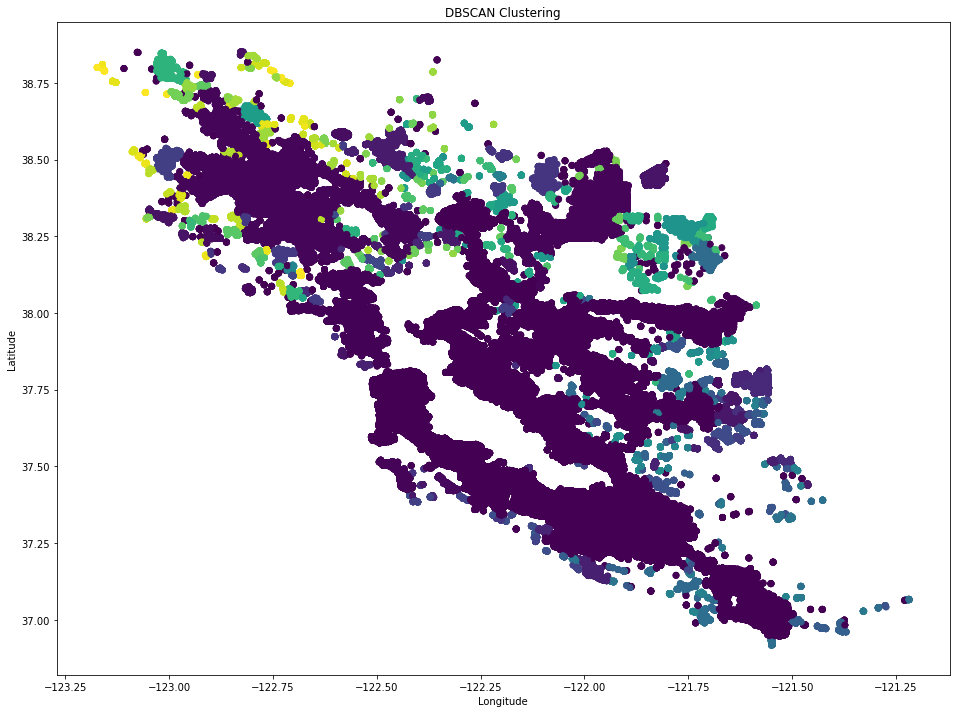

In [10]:
fig, ax = plt.subplots(figsize=(16,12))
plt.scatter(data['Longitude'], data['Latitude'], c=cluster_labels)
plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Add the weight(The one that is actually useful)

In [121]:
import pandas as pd

# Load the data from a CSV file
data = pd.read_csv('my_data.csv')

# Group the data by hex_id, hex_center_lat, and hex_center_lon
grouped_data = data.groupby(['hex_id', 'hex_center_lat', 'hex_center_lon'])

# Calculate the weight of each hex_id based on the count of rows
weights = grouped_data.size().reset_index(name='weight')

# Merge the weight data with the original grouped data
result = pd.merge(grouped_data.first(), weights, on=['hex_id', 'hex_center_lat', 'hex_center_lon'])

# Select the desired columns and save to a new CSV file
result[['hex_id', 'hex_center_lat', 'hex_center_lon', 'weight']].to_csv('weighted_hex.csv', index=False)


Number of clusters: 136


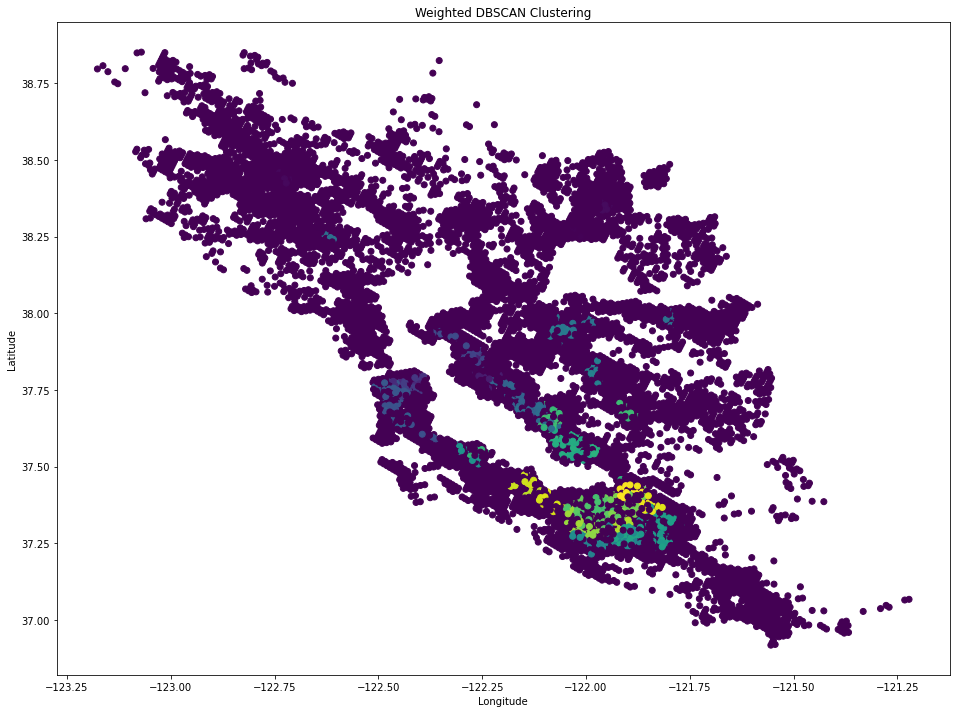

In [122]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data from a CSV file
data = pd.read_csv('weighted_hex.csv')

# Create a numpy array with the coordinates and weights
points = data[['hex_center_lat', 'hex_center_lon', 'weight']].values

# Scale the points
scaler = StandardScaler()
scaled_points = scaler.fit_transform(points)

# Perform DBSCAN clustering with weighted Euclidean distance
dbscan = DBSCAN(eps=0.08, min_samples=2200, metric='euclidean')
dbscan.fit(scaled_points, sample_weight=points[:, 2])

# Add the cluster labels to the original data
data['cluster_label'] = dbscan.labels_

# Get the cluster labels
cluster_labels = dbscan.labels_

# Count the number of clusters
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print("Number of clusters:", n_clusters)

# Save the result to a CSV file
data.to_csv('clustered_data.csv', index=False)

# Plot the clustered points
fig, ax = plt.subplots(figsize=(16,12))
plt.scatter(data['hex_center_lon'], data['hex_center_lat'], c=data['cluster_label'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Weighted DBSCAN Clustering')
plt.show()


In [10]:
import pandas as pd

# Load the data from a CSV file
data = pd.read_csv('clustered_data.csv')

# Count the number of occurrences of -1 in the cluster_label column
n_minus_ones = (data['cluster_label'] == -1).sum()

print(f"There are {n_minus_ones} occurrences of -1 in the cluster_label column.")


# Count the number of occurrences of -1 in the cluster_label column
n_minus_ones = (data['cluster_label'] == 0).sum()

print(f"There are {n_minus_ones} occurrences of 0 in the cluster_label column.")

# Filter out the rows with cluster_label == -1
clean_data = data[data['cluster_label'] != -1]

print(sum(clean_data["weight"])/2008998)

clean_data = clean_data.sort_values(by=['cluster_label'])
print(clean_data)

# Save the clean data to a new CSV file
clean_data.to_csv('clustered_data_clean.csv', index=False)


There are 8161 occurrences of -1 in the cluster_label column.
There are 5 occurrences of 0 in the cluster_label column.
0.24757117727344677
               hex_id  hex_center_lat  hex_center_lon  weight  cluster_label
364   8828300843fffff       38.267539     -122.034300     505              0
366   8828300847fffff       38.269910     -122.023821     461              0
367   8828300849fffff       38.253494     -122.029978     482              0
372   8828300855fffff       38.273376     -122.041701     500              0
542   8828300b1bfffff       38.250024     -122.012100     491              0
...               ...             ...             ...     ...            ...
8452  8828347a97fffff       37.437760     -121.904164    1034            134
8478  8828347ad9fffff       37.398835     -121.909087    1023            134
8481  8828347ae1fffff       37.410568     -121.857059     750            135
8482  8828347ae3fffff       37.416478     -121.864397     741            135
8444  8828347

In [111]:
clean_data = pd.read_csv('clustered_data_clean.csv')

In [53]:
import contextily as ctx

In [58]:
plt.rcParams.update({'font.size': 24})
plt.gcf().set_dpi(300);

<Figure size 1920x1440 with 0 Axes>

In [112]:
selected = clean_data.groupby('cluster_label')['weight'].sum().reset_index().sort_values('weight', ascending=False).head(20)['cluster_label'].to_numpy()
clean_data = clean_data[clean_data['cluster_label'].isin(selected)]

In [115]:
from matplotlib.colors import ListedColormap

# Define the 20 different colors
colors = [
    '#FF0000', '#00FF00', '#0000FF', '#FFA500', '#FFFF00', '#FF00FF', '#00FFFF', '#800080',
    '#008080', '#FFC0CB', '#A52A2A', '#000080', '#808000', '#FFD700', '#C0C0C0', '#800000',
    '#ADD8E6', '#006400', '#FF7F50', '#4B0082'
]
# Create the colormap object
cmap = ListedColormap(colors)

In [122]:
vector = np.array([11, 13, 17, 33, 36, 40, 42, 47, 60, 72, 73, 75, 81, 82, 83, 92, 95, 97, 105, 112])

# Define the new labels from 1 to 20
new_labels = np.arange(1, 21)

# Create a dictionary to map old labels to new labels
label_mapping = dict(zip(sorted(vector), new_labels))

# Use the dictionary to reindex the vector
reindexed_vector = np.vectorize(label_mapping.get)(clean_data['cluster_label'])

In [123]:
reindexed_vector

array([ 1,  1,  1,  1,  1,  2,  2,  3,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
       14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20])

In [119]:
clean_data['cluster_label'].unique()

array([ 11,  13,  17,  33,  36,  40,  42,  47,  60,  72,  73,  75,  81,
        82,  83,  92,  95,  97, 105, 112])

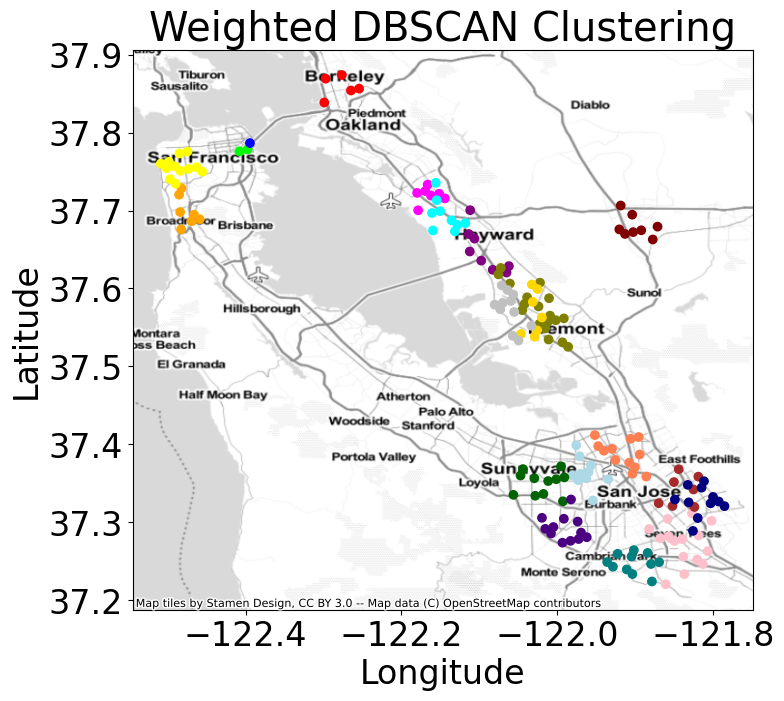

In [125]:
# Define a color map with discrete colors


# Plot the clustered points with the specified color map
fig, ax = plt.subplots(figsize=(8,12))
sc = ax.scatter(clean_data['hex_center_lon'], 
                clean_data['hex_center_lat'], 
                c=reindexed_vector,
                cmap=cmap)
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.Stamen.TonerLite, zoom=10)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Weighted DBSCAN Clustering')
plt.show()


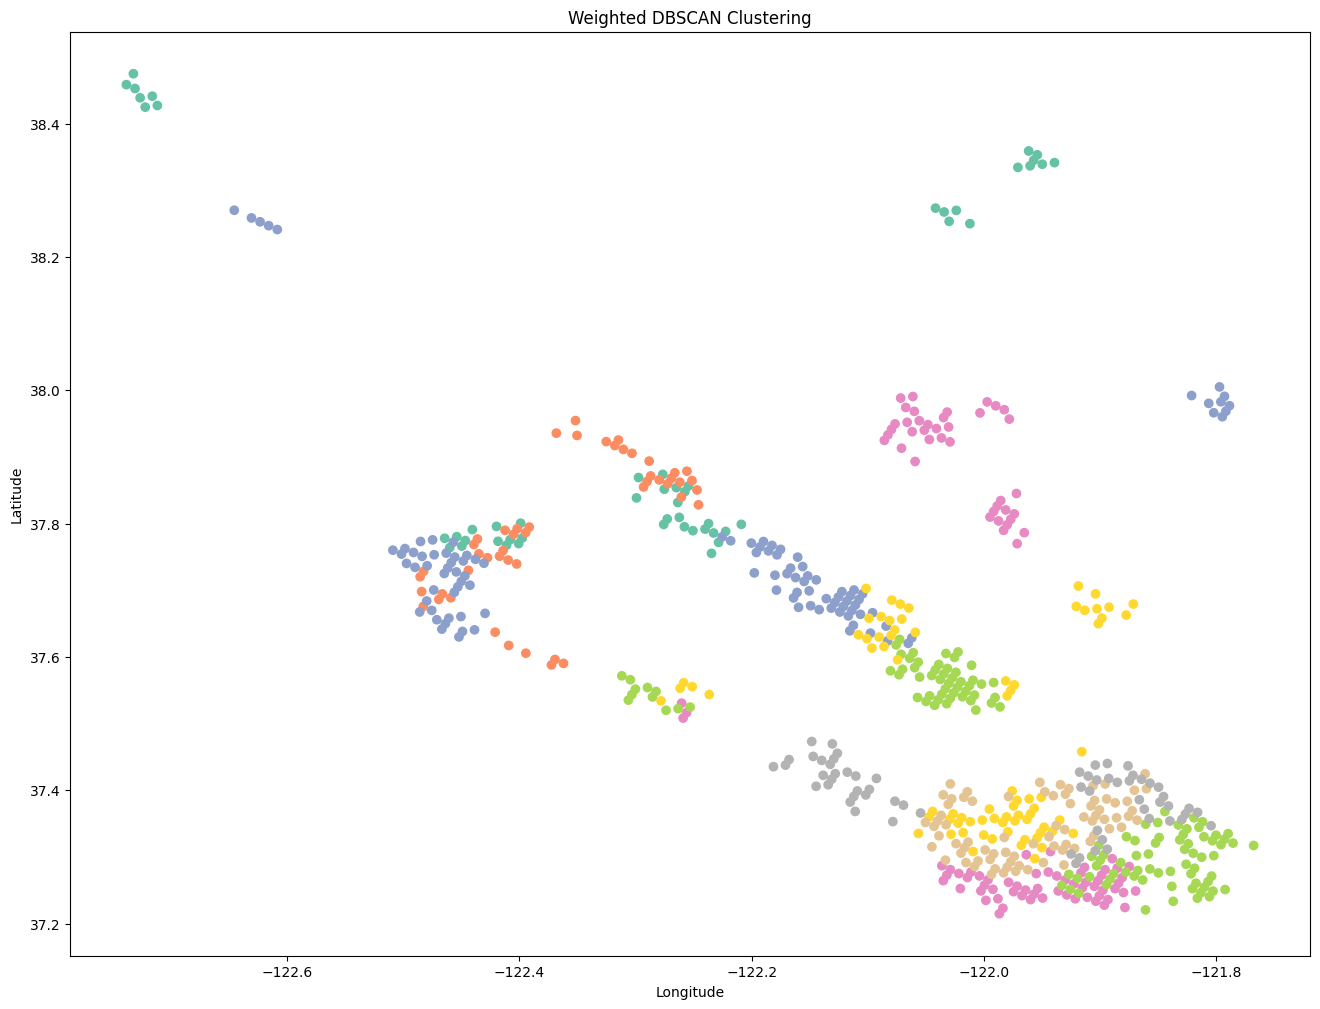

In [4]:
# Define a color map with discrete colors
cmap = plt.get_cmap('Set2')

# Plot the clustered points with the specified color map
fig, ax = plt.subplots(figsize=(16,12))
plt.scatter(clean_data['hex_center_lon'], clean_data['hex_center_lat'], c=clean_data['cluster_label'], cmap=cmap)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Weighted DBSCAN Clustering')
plt.show()


In [9]:
import folium

# Define a color map with discrete colors
cmap = plt.get_cmap('Set2')

# Create a map centered on the mean latitude and longitude of the data
center_lat = clean_data['hex_center_lat'].mean()
center_lon = clean_data['hex_center_lon'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Plot the clustered points with the specified color map
for i in range(len(clean_data)):
    folium.CircleMarker(location=[clean_data.loc[i,'hex_center_lat'], clean_data.loc[i,'hex_center_lon']],
                        radius=5,
                        color=cmap(clean_data.loc[i,'cluster_label']),
                        fill=True,
                        fill_color=cmap(clean_data.loc[i,'cluster_label'])).add_to(m)

# Display the map
m



KeyError: 0

### The largest area of the clustering is 3.11 square km, consist of 17 res 8 hexagon.

In [132]:
import h3

hexBoundary = h3.cellToBoundary("882834652bfffff")

AttributeError: module 'h3' has no attribute 'cellToBoundary'

### Random sets.

In [4]:
import random
import csv

# Generate 500 sets of random numbers
sets = []
for i in range(5000):
    # Generate a random number between 1 and 20
    num = random.randint(1, 20)
    # Generate a random number of numbers between 1 and 20
    num_of_nums = random.randint(1, 20)
    # Generate a set of random numbers between 1 and 20
    rand_set = set(random.sample(range(1, 21), num_of_nums))
    # Add the random number to the set
    rand_set.add(num)
    # Add the set to the list of sets
    sets.append(rand_set)

# Export the sets to a CSV file
with open('random_sets.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write the header row
    writer.writerow(['Set Number', 'Numbers'])
    # Write each set to a row in the CSV file
    for i, rand_set in enumerate(sets):
        writer.writerow([i+1, ', '.join(map(str, rand_set))])



### find the center of the cluster

In [6]:
import pandas as pd

# read the data frame from the csv file
df = pd.read_csv('clustered_data_clean.csv')

# group the rows by the "cluster_label" column and get the sum of "weight"
# and the mean of "hex_center_lat" and "hex_center_lon"
grouped_df = df.groupby('cluster_label').agg({'weight': 'sum',
                                               'hex_center_lat': 'mean',
                                               'hex_center_lon': 'mean'})

# rename the columns to match the expected output
grouped_df = grouped_df.rename(columns={'hex_center_lat': 'cluster_center_lat',
                                        'hex_center_lon': 'cluster_center_lon'})

# reset the index to have "cluster_label" as a regular column
grouped_df = grouped_df.reset_index()

# sort the values by the descending order of the "weight" column
grouped_df = grouped_df.sort_values('weight', ascending=False)

# display the resulting data frame
print(grouped_df)


     cluster_label  weight  cluster_center_lat  cluster_center_lon
81              81   12866           37.572222         -122.024282
105            105   11635           37.387236         -121.915773
72              72    8936           37.271927         -121.838677
83              83    8488           37.573316         -122.060995
75              75    7738           37.327112         -121.815283
..             ...     ...                 ...                 ...
51              51    2235           37.970663         -121.990249
16              16    2214           37.769245         -122.453134
135            135    2208           37.416478         -121.864397
116            116    2206           37.315521         -122.009780
48              48    2201           37.681501         -122.145064

[136 rows x 4 columns]


In [7]:
# save the resulting data frame to a csv file
grouped_df.to_csv('clustered_data_grouped.csv', index=False)


### select the one's that has the cluster number -1

In [1]:
import pandas as pd

# read the data into a Pandas DataFrame
clustered_data = pd.read_csv("clustered_data.csv")

# select all rows that have "cluster_label" equal to -1
clustered_data_minus1 = clustered_data[clustered_data['cluster_label'] == -1]

# save the result to a new CSV file
clustered_data_minus1.to_csv("clustered_data_-1.csv", index=False)


### cluster data

In [11]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

# read in the two CSV files
clustered_data = pd.read_csv("clustered_data_-1.csv")
df2 = pd.read_csv("clustered_data_clean.csv")
clustered_data_grouped = pd.read_csv("clustered_data_grouped.csv")

# create a new column in clustered_data to store the assigned cluster_label
clustered_data['assigned_cluster_label'] = np.nan

# loop through each row in clustered_data
for index, row in clustered_data.iterrows():

    # extract the lat/lon coordinates of the row
    point = np.array([row['hex_center_lat'], row['hex_center_lon']]).reshape(1, -1)

    # calculate the distance between this point and each cluster center
    distances = cdist(point, clustered_data_grouped[['cluster_center_lat', 'cluster_center_lon']])

    # find the index of the closest cluster center
    closest_index = np.argmin(distances)

    # assign the cluster_label of the closest cluster center to this row in clustered_data
    clustered_data.at[index, 'assigned_cluster_label'] = clustered_data_grouped.iloc[closest_index]['cluster_label']

clustered_data = clustered_data.drop('cluster_label', axis=1)
clustered_data = clustered_data.rename(columns={'assigned_cluster_label': 'cluster_label'})

    
# save the updated clustered_data DataFrame to a new CSV file
clustered_data.to_csv("clustered_data_assigned.csv", index=False)


In [12]:
clustered_data_total = pd.concat([clustered_data, df2], ignore_index=True)
clustered_data_total.to_csv("clustered_data_total.csv", index=False)